## Libraries

### Libraries are awesome


The strength of a language lies as much in the set of libraries available, as it does
in the language itself.

A great set of libraries allows for a very powerful programming style:

* Write minimal code yourself
* Choose the right libraries
* Plug them together
* Create impressive results

Not only is this efficient with your programming time, it's also more efficient with computer
time.

The chances are any algorithm you might want to use has already been programmed better by someone else.

This lecture is available as an [IPython Notebook](http://nbviewer.ipython.org/url/development.rc.ucl.ac.uk/training/engineering/session04/../python/session04.ipynb)



## Careful use of Libraries

### Drawbacks of libraries.


* Sometimes, libraries are not looked after by their creator: code that is not maintained *rots*:
    * It no longer works with later versions of *upstream* libraries.
    * It doesn't work on newer platforms or systems.
    * Features that are needed now, because the field has moved on, are not added

* Sometimes, libraries are hard to get working:
    * For libraries in pure python, this is almost never a problem
    * But many libraries involve *compiled components*: these can be hard to install.


### Contribute, don't duplicate


* You have a duty to the ecosystem of scholarly software:
    * If there's a tool or algorithm you need, find a project which provides it.
    * If there are features missing, or problems with it, fix them, [don't create your own](http://xkcd.com/927/) library.


### How to choose a library


* When was the last commit?
* How often are there commits?
* Can you find the lead contributor on the internet?
* Do they respond when approached:
    * emails to developer list
    * personal emails
    * tweets
    * [irc](https://freenode.net)
    * issues raised on GitHub?
* Are there contributors other than the lead contributor?
* Is there discussion of the library on Stack Exchange?
* Is the code on an open version control tool like GitHub?
* Is it on standard package repositories. (PyPI, apt/yum/brew)
* Are there any tests?
* Download it. Can you build it? Do the tests pass?
* Is there an open test dashboard? (Travis/Jenkins/CDash)
* What dependencies does the library itself have? Do they pass this list?
* Are different versions of the library clearly labeled with version numbers?
* Is there a changelog?


### Sensible Version Numbering


The best approach to version numbers clearly distinguishes kinds of change:

Given a version number MAJOR.MINOR.PATCH, e.g. 2.11.14 increment the:

* MAJOR version when you make incompatible API changes,
* MINOR version when you add functionality in a backwards-compatible manner, and
* PATCH version when you make backwards-compatible bug fixes.

This is called [Semantic Versioning](http://semver.org)


## Python Libraries

### The Python Standard Library


Python comes with a powerful [standard library](https://docs.python.org/2/library/).

Learning python is as much about learning this library as learning the language itself.

You've already seen a few packages in this library: `math`, `pdb`, `pytest`, `datetime`.


### The Python Package Index


Python's real power, however, comes with the Python Package Index: [PyPI](https://pypi.python.org/pypi).
This is a huge array of libraries, with all kinds of capabilities, all easily installable from the 
command line or through your Python distribution.


### Pip


Packages from PyPI are installed using Pip.


```
pip list # See what you have installed
pip search geopy # Search PyPI for a package
sudo pip install <package> # install a package
sudo pip install <package> --upgrade # upgrade
sudo pip uninstall <package>
```

## Some libraries

### Argparse


This is the standard library for building programs with a command-line interface.







In [1]:
%%writefile greeter.py
#!/usr/bin/env python
from argparse import ArgumentParser
if __name__ == "__main__":
    parser = ArgumentParser(description = "Generate appropriate greetings")
    parser.add_argument('--title', '-t')
    parser.add_argument('--polite','-p', action="store_true")
    parser.add_argument('personal')
    parser.add_argument('family')
    arguments= parser.parse_args()
    greeting= "How do you do, " if arguments.polite else "Hey, "
    if arguments.title:
        greeting+=arguments.title+" "
    greeting+= arguments.personal + " " + arguments.family +"."
    print greeting


Overwriting greeter.py


In [2]:
%%bash
#!/usr/bin/env bash
chmod u+x greeter.py
./greeter.py --help
./greeter.py James Hetherington
./greeter.py --polite James Hetherington
./greeter.py James Hetherington --title Dr


usage: greeter.py [-h] [--title TITLE] [--polite] personal family

Generate appropriate greetings

positional arguments:
  personal
  family

optional arguments:
  -h, --help            show this help message and exit
  --title TITLE, -t TITLE
  --polite, -p
Hey, James Hetherington.
How do you do, James Hetherington.
Hey, Dr James Hetherington.


### Operating system paths and files


When loading and saving files, standard libraries allow you to manage file names,
in an operating-system independent way:



In [3]:
__file__ = "session04.ipynb" # No __file__ in notebook!

In [4]:
from os.path import join, dirname, abspath
# Load the data file from session 1
datapath=join(dirname(dirname(abspath(__file__))),
              'session01', 'data', 'inflammation-01.csv')
newpath=join(dirname(__file__), 'midvals.yaml')




And you'll want to be able to read and write to files:




In [5]:
source = open(datapath)
import csv
reader = csv.reader(source)
midvals = [row[len(row)/2] for row in reader]
print midvals
source.close()

['6', '18', '19', '17', '9', '12', '9', '20', '6', '18', '8', '9', '13', '15', '12', '9', '13', '13', '7', '9', '18', '12', '16', '14', '17', '7', '9', '15', '20', '14', '13', '19', '11', '10', '14', '15', '16', '15', '19', '15', '18', '19', '12', '18', '6', '14', '19', '10', '12', '16', '5', '20', '11', '15', '16', '16', '14', '9', '8', '6']





Note the use of the `csv` library to read csv files as well.


### Context managers


There's a better way to handle opening and closing files




In [6]:
import yaml
with open(newpath, 'w') as yamlfile:
    yaml.dump(midvals, yamlfile)




This syntax using `with` is called a context manager.
It is used when a library wants stuff to happen both before **and** after client code is called.

Here, [`yaml`](http://www.yaml.org) is another standard file format for data files similar to XML or CSV.


### Working with web resources


To interact with resources on the web, you need a way to work with URLs: escaping characters that
can't appear in URLs, composing ?foo=bar web argument strings and so on.

We can use the [requests](http://docs.python-requests.org/en/latest/) library from PyPI for this.




In [7]:

import requests
ucl=requests.get(
    'http://en.wikipedia.org/wiki/University_College_London'
)
map_here=requests.get('http://maps.googleapis.com/maps/api/staticmap',
        params={'center':"51.5, -0.1", 'size':"400x400", 'zoom':10})
print ucl.url
print map_here.url


https://en.wikipedia.org/wiki/University_College_London
http://maps.googleapis.com/maps/api/staticmap?size=400x400&zoom=10&center=51.5%2C+-0.1





And you can download files from the web, accessing headers and the body of the response:




In [8]:

print "Beginning of HTML file", ucl.text.split()[0:2]
with open('map.png','w') as map_image:
    map_image.write(map_here.content)


Beginning of HTML file [u'<!DOCTYPE', u'html>']





Libraries even allow you to parse HTML content, to find the data you want within a page:




In [9]:
# pip install beautifulsoup4
from bs4 import BeautifulSoup
import re # Python regular expression library
wikipage=BeautifulSoup(ucl.text)
# HTML looks like <span class="latitude">value</span>
motto=wikipage.find(text=re.compile("Motto"))

#print 'Coordinates:', latitude, longitude

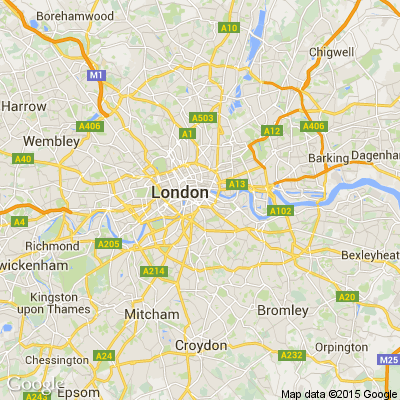

In [10]:
import IPython
IPython.core.display.Image(map_here.content)

## Graph of Green Spaces

### The problem


Let's look at an extended example of using libraries to work with Python to analyse data.

We'd like to know how density of green space varies as we move from city centre to the countryside:

* Find the location of two places by name
* Obtain maps or satellite images of the geography at points between them
    * In this toy example: just evenly divide the range
* Determine the proportion of the images that are parkland
    * In this toy example: bits that are green!
* Plot a graph


### Geolocation


Google provides a service to go from "London" to 51.51N, 0.1275W. Fortunately, there's a very nice library
on PyPI to access it: `pip install geopy`




In [11]:
import geopy
geocoder=geopy.geocoders.GoogleV3(domain="maps.google.co.uk")
def geolocate(place):
  return geocoder.geocode(place,exactly_one=False)[0][1]

london_location=geolocate("London")
print london_location

(51.5073509, -0.1277583)


### Addressing the google maps API


Google maps has a static API to obtain satellite images with URLs like this:

[http://maps.googleapis.com/maps/api/staticmap?size=400x400&sensor=false&zoom=10&center=51.5072,-0.1275](http://maps.googleapis.com/maps/api/staticmap?size=400x400&sensor=false&zoom=10&center=51.5072,-0.1275)

We'll therefore need to use a library to build this URL, and fetch the result

`sudo pip install pypng` will get you this library.




In [12]:
import requests
def map_at(lat,long, satellite=False, zoom=12, 
           size=(400,400), sensor=False):
    base="http://maps.googleapis.com/maps/api/staticmap?"
    params=dict(
        sensor= str(sensor).lower(),
        zoom= zoom,
        size= "x".join(map(str,size)),
        center= ",".join(map(str,(lat,long))),
        style="feature:all|element:labels|visibility:off"
    )
    if satellite:
        params["maptype"]="satellite"
    return requests.get(base,params=params)


map_response=map_at(51.5072, -0.1275, zoom=10)
url=map_response.url
print url


http://maps.googleapis.com/maps/api/staticmap?style=feature%3Aall%7Celement%3Alabels%7Cvisibility%3Aoff&center=51.5072%2C-0.1275&sensor=false&zoom=10&size=400x400


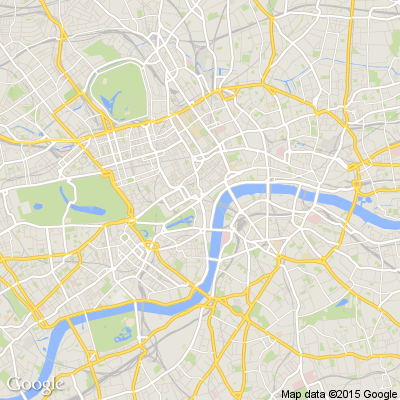

In [13]:
import IPython
map_png=map_at(*london_location)
IPython.core.display.Image(map_png.content)

### Finding the green bits


We'll need a library to parse `.png` image files and determine which bits are green:




In [14]:
def is_green(r,g,b):
  threshold=1.1
  return g>r*threshold and g>b*threshold

import png
from itertools import izip

def count_green_in_png(data):
    image=png.Reader(file=StringIO(data.content)).asRGB()
    count = 0
    for row in image[2]:
        pixels=izip(*[iter(row)]*3)
        count+=sum(1 for pixel in pixels if is_green(*pixel))
    return count

from StringIO import StringIO
print count_green_in_png(map_at(*london_location))

12271


### Checking our code


We could write some unit tests, but for something like this, visualisation is the key to
verification. Let's look which bits are green by building a new png.

We could write the new png to disk, but we can use `StringIO` to get a string in memory which
behaves like a file:




In [15]:
def show_green_in_png(data):
    image=png.Reader(file=StringIO(data.content)).asRGB()
    count = 0
    out=[]
    for row in image[2]:
        outrow=[]
        pixels=izip(*[iter(row)]*3)
        for pixel in pixels:
            outrow.append(0)
            if is_green(*pixel):
                outrow.append(255)
            else:
                outrow.append(0)
            outrow.append(0)
        out.append(outrow)
    buffer=StringIO()
    result = png.from_array(out,mode='RGB')
    result.save(buffer)
    return buffer.getvalue()

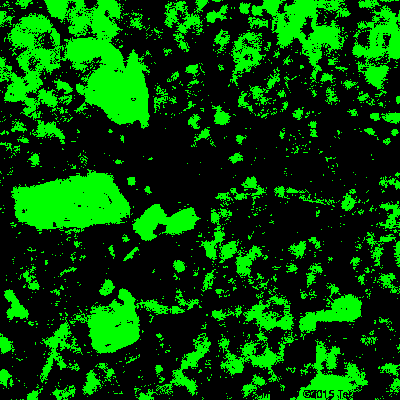

In [16]:
IPython.core.display.Image(show_green_in_png(map_at(*london_location,satellite=True)))

### Points in between


We need all the points equally spaced between two locations.
Numpy has a routine for just this:




In [17]:
from numpy import linspace
def location_sequence(start,end,steps):
  # Would actually prefer this if steps
  # were deduced from zoomlevel
  # But need projection code for that
  lats=linspace(start[0],end[0],steps)
  longs=linspace(start[1],end[1],steps)
  return zip(lats,longs)

[count_green_in_png(map_at(*location,zoom=10,satellite=True))
            for location in location_sequence(
                geolocate("London"),
                geolocate("Birmingham"),
                10)]

[106806,
 127985,
 157091,
 158679,
 158033,
 158833,
 158561,
 156501,
 149482,
 140037]

### The results

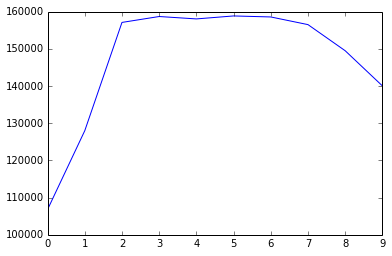

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([count_green_in_png(map_at(*location,zoom=10,satellite=True))
            for location in location_sequence(geolocate("London"),geolocate("Birmingham"),10)])

## Packaging

### Packaging


Once we've made a working program, we'd like to be able to share it with others.

A good cross-platform build tool is the most important thing: you can always
have collaborators build from source.


### Distribution tools


Distribution tools allow one to obtain a working copy of someone else's package.

Language-specific tools: PyPI, Ruby Gems, CPAN, CRAN
Platform specific packagers e.g. brew, apt/yum

Windows doesn't have anything like `brew install` or `apt-get`
You have to build an 'installer'.


### Laying out a project


When planning to package a project for distribution, defining a suitable
project layout is essential.




In [70]:
%%bash
tree --charset ascii greetings

greetings
|-- CITATION.md
|-- Greetings.egg-info
|   |-- PKG-INFO
|   |-- SOURCES.txt
|   |-- dependency_links.txt
|   |-- requires.txt
|   `-- top_level.txt
|-- LICENSE.md
|-- README.md
|-- conf.py
|-- doc
|   |-- _sources
|   |   `-- index.txt
|   |-- _static
|   |   |-- ajax-loader.gif
|   |   |-- basic.css
|   |   |-- comment-bright.png
|   |   |-- comment-close.png
|   |   |-- comment.png
|   |   |-- default.css
|   |   |-- doctools.js
|   |   |-- down-pressed.png
|   |   |-- down.png
|   |   |-- file.png
|   |   |-- jquery.js
|   |   |-- minus.png
|   |   |-- plus.png
|   |   |-- pygments.css
|   |   |-- searchtools.js
|   |   |-- sidebar.js
|   |   |-- underscore.js
|   |   |-- up-pressed.png
|   |   |-- up.png
|   |   `-- websupport.js
|   |-- genindex.html
|   |-- index.html
|   |-- objects.inv
|   |-- search.html
|   `-- searchindex.js
|-- greetings
|   |-- __init__.py
|   |-- __init__.pyc
|   |-- command.py
|   |-- command.pyc
|   |-- greeter.py
|   |-- greeter.pyc
|   |-- s

We can start by making our directory structure

In [71]:
%%bash
mkdir -p greetings/greetings/test/fixtures
mkdir -p greetings/scripts

### Using setuptools


To make python code into a package, we have to write a `setupfile`:







In [72]:
%%writefile greetings/setup.py

from setuptools import setup, find_packages

setup(
    name = "Greetings",
    version = "0.1",
    packages = find_packages(exclude=['*test']),
    scripts = ['scripts/greet'],
    install_requires = ['argparse']
)

Overwriting greetings/setup.py





We can now install this code with


```
sudo python setup.py install
```


And the package will be then available to use everywhere on the system:


In [73]:
import greetings
from greetings.greeter import greet
print greetings.greeter.greet("James","Hetherington")

Hey, James Hetherington.



And the scripts are now available as command line commands:




In [74]:
%%bash
#!/usr/bin/env bash
greet --help

usage: greet [-h] [--title TITLE] [--polite] personal family

Generate appropriate greetings

positional arguments:
  personal
  family

optional arguments:
  -h, --help            show this help message and exit
  --title TITLE, -t TITLE
  --polite, -p


In [75]:
%%bash
greet James Hetherington
greet --polite James Hetherington
greet James Hetherington --title Dr

Hey, James Hetherington.
How do you do, James Hetherington.
Hey, Dr James Hetherington.


### Installing from GitHub


We could now submit "greeter" to PyPI for approval, so everyone could `pip install` it.

However, when using git, we don't even need to do that: we can install directly from any git URL:


```
sudo pip install git+git://github.com/jamespjh/greeter
```

In [67]:
%%bash
greet Humphry Appleby --title Sir

Hey, Sir Humphry Appleby.



Try it!


### Convert the script to a module


Of course, there's more to do when taking code from a quick script and turning it into a proper module:







In [69]:
%%writefile greetings/greetings/greeter.py

def greet(personal, family, title="", polite=False):

    """ Generate a greeting string for a person.

    Parameters
    ----------
    personal: str
        A given name, such as Will or Jean-Luc
    family: str
        A family name, such as Riker or Picard
    title: str
        An optional title, such as Captain or Reverend
    polite: bool
        True for a formal greeting, False for informal.

    Returns
    -------
    string
        An appropriate greeting
    """

    greeting= "How do you do, " if polite else "Hey, "
    if title:
        greeting+=title+" "

    greeting+= personal + " " + family +"."
    return greeting

Overwriting greetings/greetings/greeter.py





The documentation string explains how to use the function; don't worry about this for now, we'll consider
this next time.


### Write an executable script

In [53]:
%%writefile greetings/greetings/command.py
from argparse import ArgumentParser
from greeter import greet

def process():
   parser = ArgumentParser(description = "Generate appropriate greetings")

   parser.add_argument('--title', '-t')
   parser.add_argument('--polite', '-p', action="store_true")
   parser.add_argument('personal')
   parser.add_argument('family')

   arguments= parser.parse_args()

   print greet(arguments.personal, arguments.family, arguments.title, arguments.polite)

if __name__ == "__main__":
    process()

Overwriting greetings/greetings/command.py


### Write an entry point script stub

In [54]:
%%writefile greetings/scripts/greet

#!/usr/bin/env python
from greetings.command import process
process()

Writing greetings/scripts/greet


### Write a readme file

e.g.:

In [55]:
%%writefile greetings/README.md

Greetings!
==========

This is a very simple example package used as part of the UCL
[Research Software Engineering with Python](development.rc.ucl.ac.uk/training/engineering) course.

Overwriting greetings/README.md


### Write a license file

e.g.:

In [56]:
%%writefile greetings/LICENSE.md

(C) University College London 2014

This "greetings" example package is granted into the public domain.


Overwriting greetings/LICENSE.md


### Write a citation file

e.g.:

In [57]:
%%writefile greetings/CITATION.md

If you wish to refer to this course, please cite the URL
http://development.rc.ucl.ac.uk/training/engineering

Portions of the material are taken from Software Carpentry
http://swcarpentry.org


Overwriting greetings/CITATION.md


### Define packages and executables

In [58]:
%%bash
touch greetings/greetings/test/__init__.py
touch greetings/greetings/__init__.py
chmod u+x greetings/greetings/command.py
# chmod u+x greetings/scripts/greet

### Write some unit tests


Separating the script from the logical module made this possible:







In [59]:
%%writefile greetings/greetings/test/test_greeter.py
import yaml
import os
from ..greeter import greet
from nose.tools import assert_equal
def test_greeter():
    with open(os.path.join(os.path.dirname(__file__),'fixtures','samples.yaml')) as fixtures_file:
        fixtures=yaml.load(fixtures_file)
        for fixture in fixtures:
            answer=fixture.pop('answer')
            assert_equal(greet(**fixture), answer)


Overwriting greetings/greetings/test/test_greeter.py





Add a fixtures file:







In [60]:
%%writefile greetings/greetings/test/fixtures/samples.yaml
- personal: James
  family: Hetherington
  answer: "Hey, James Hetherington."
- personal: James
  family: Hetherington
  polite: True
  answer: "How do you do, James Hetherington."
- personal: James
  family: Hetherington
  title: Dr
  answer: "Hey, Dr James Hetherington."


Overwriting greetings/greetings/test/fixtures/samples.yaml


### Developer Install


If you modify your source files, you would now find it appeared as if the program doesn't change.

That's because pip install **copies** the file.

(On my system to /Library/Python/2.7/site-packages/: this is operating
system dependent.)

If you want to install a package, but keep working on it, you can do


```
sudo python setup.py develop
```

### Distributing compiled code


If you're working in C++ or Fortran, there is no language specific repository.
You'll need to write platform installers for as many platforms as you want to
support.

Typically:

* `dpkg` for `apt-get` on Ubuntu and Debian
* `rpm` for `yum` on Redhat and Fedora
* `homebrew` on OSX (Possibly `macports` as well)
* An executable `msi` installer for Windows.


### Homebrew


Homebrew: A ruby DSL, you host off your own webpage

See my [installer for the cppcourse example](http://github.com/jamespjh/homebrew-reactor)

If you're on OSX, do:


```
brew tap jamespjh/homebrew-reactor
brew install reactor
```

### Exercises


We previously looked at Greengraph.py, a script that enables us to explore how green space varies as we move from the city to the countryside:


In [33]:
### "geolocation"
import geopy
geocoder=geopy.geocoders.GoogleV3(domain="maps.google.co.uk")

def geolocate(place):
    return geocoder.geocode(place,exactly_one=False)[0][1]

london_location=geolocate("London")
print london_location

(51.5073509, -0.1277583)



The Greengraph example is only available as a single large [script](https://github.com/UCL/rsd-engineeringcourse/blob/master/../python/greengraph.py).

Your task is to transform this into a python package that can be pip installed directly from GitHub. Remember to include:

- an \__init\__.py file
- a setup.py file
- tests
- license and documentation